<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/projeto_fake_news_3_FINAL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de tópicos**

In [53]:
!pip install pyLDAvis

In [54]:
import pandas as pd
import numpy as np
 
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import LatentDirichletAllocation

import nltk
#from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.stem import 	WordNetLemmatizer 
from nltk.corpus import stopwords
#nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')


#from gensim.matutils import Sparse2Corpus
#from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
data_df = pd.read_json('https://raw.githubusercontent.com/SamiraHabib/Fake_News/main/fakeNews_FINAL.json')

In [56]:
data_df.head(2)

claim_datetime  ...                                       review_total
0  2019-12-13T00:00:00+00:00  ...  normandy summit results the eu plays on russia...
1  2019-09-26T00:00:00+00:00  ...  the us benefits from the attack on the saudi o...

[2 rows x 22 columns]

In [57]:
data_df.shape


(6238, 22)

##**Criar tokens, remover stop words e transformar no radical**

In [58]:
from gensim.utils import simple_preprocess

import spacy
from nltk.corpus import stopwords

**Lematização com spacy**

In [59]:
tags = ["NOUN", "ADJ", "VERB", "ADV"]

In [60]:
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [61]:
lemma_text = []

for texts in data_df['review_total']:
  doc = nlp(texts)
  new_text = []
  for token in doc:
    if token.pos_ in tags:
      new_text.append(token.lemma_)
  
  final = " ".join(new_text)
  lemma_text.append(final)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarni

**Pre-processamento simples com o gensim**

In [62]:
preprocess_text = []

for words in lemma_text:
  new = simple_preprocess(words, deacc = True)
  preprocess_text.append(new)

**Retirando stopwords**

In [63]:
stop_words = set(stopwords.words('english')) 

In [64]:
stopwords_list = []

for lists in preprocess_text:
  stop_temp = []

  for word in lists:
    if word not in stop_words:
      stop_temp.append(word)

  stopwords_list.append(stop_temp)

**Transformando no radical**

LEMMA

In [65]:
lemma = WordNetLemmatizer()

In [66]:
lemma_words = []

for lists in stopwords_list:
  lemma_temp = []

  for word in lists:
    lemma_temp.append(lemma.lemmatize(word))


  lemma_words.append(lemma_temp)

STEM

In [67]:
stemmer = RSLPStemmer()

In [68]:
stem_words = []

for lists in lemma_words:
  stem_temp = []

  for word in lists:
    stem_temp.append(stemmer.stem(word))


  stem_words.append(stem_temp)

In [69]:
data_df['stemmer'] = stem_words

In [70]:
data_df['stemmer'].head()

0    [summit, result, play, sid, betray, kyiv, brig...
1    [benefit, attack, saud, oil, recent, attack, s...
2    [polish, legion, organiz, historic, figur, est...
3    [may, use, eastern, cannon, fodd, new, larg, d...
4    [resolution, reliev, responsibility, beneficia...
Name: stemmer, dtype: object

In [71]:
data_df['preprocess'] = data_df['stemmer'].apply(lambda x: ' '.join(x))

In [72]:
data_df['preprocess']

0       summit result play sid betray kyiv bright futu...
1       benefit attack saud oil recent attack saud oil...
2       polish legion organiz historic figur establish...
3       may use eastern cannon fodd new larg degre bru...
4       resolution reliev responsibility beneficiary r...
                              ...                        
7360    turn land commodity sell exchang imfapparently...
7361    want divid want divid stat send troop money ar...
7362    clos succeed fail te apart russiath ukrainian ...
7363    falsifi history pact caus wwiith parliament fa...
7365    help terrorist lead offic say summit intellige...
Name: preprocess, Length: 6238, dtype: object

##**Gensim**

**criando corpus e dicionario gensim**

In [73]:
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

import pyLDAvis
import pyLDAvis.gensim_models as gensim_models
pyLDAvis.enable_notebook()

In [74]:
dictionary = corpora.Dictionary(stem_words)

In [75]:
dict(dictionary)

{0: 'accord',
 1: 'act',
 2: 'aggression',
 3: 'agre',
 4: 'agreement',
 5: 'ahead',
 6: 'aim',
 7: 'ally',
 8: 'along',
 9: 'already',
 10: 'als',
 11: 'alway',
 12: 'antiukrainian',
 13: 'armed',
 14: 'articl',
 15: 'authority',
 16: 'basil',
 17: 'betray',
 18: 'big',
 19: 'bleak',
 20: 'bright',
 21: 'call',
 22: 'carry',
 23: 'cas',
 24: 'challeng',
 25: 'civil',
 26: 'claim',
 27: 'cle',
 28: 'collaps',
 29: 'comethil',
 30: 'commit',
 31: 'common',
 32: 'complet',
 33: 'conclusion',
 34: 'confident',
 35: 'conflict',
 36: 'confrontation',
 37: 'continu',
 38: 'cost',
 39: 'could',
 40: 'decl',
 41: 'destroy',
 42: 'dictat',
 43: 'disinformation',
 44: 'disintegrat',
 45: 'disintegration',
 46: 'do',
 47: 'early',
 48: 'end',
 49: 'enjoy',
 50: 'equipment',
 51: 'even',
 52: 'eventually',
 53: 'evidenc',
 54: 'expect',
 55: 'extern',
 56: 'fabricat',
 57: 'fac',
 58: 'falsehood',
 59: 'find',
 60: 'fir',
 61: 'forc',
 62: 'foreign',
 63: 'format',
 64: 'formation',
 65: 'french',

In [76]:
corpus = [dictionary.doc2bow(text) for text in data_df['stemmer']]

In [77]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 3),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 2),
  (63, 3),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 3)

**valores otimos da lda segundo a coerência UMASS**

In [78]:
model_list = []
coherence_list = []

for num_topic in range(5, 100, 5):
  lda = LdaModel(corpus= corpus, id2word= dictionary, num_topics= num_topic)
  model_list.append(lda)

  coherence = CoherenceModel(model= lda, dictionary = dictionary, texts= data_df['stemmer'], coherence='u_mass')
  coherence_list.append(coherence.get_coherence())


A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np

In [79]:
x = range(5, 100, 5)

for n, cohe in zip(x, coherence_list):
  print(f"Tópico {n}", f"tem valor:{round(cohe, 4)}")

Tópico 5 tem valor:-1.6633
Tópico 10 tem valor:-2.0785
Tópico 15 tem valor:-2.1341
Tópico 20 tem valor:-2.4402
Tópico 25 tem valor:-2.8207
Tópico 30 tem valor:-3.0838
Tópico 35 tem valor:-3.6593
Tópico 40 tem valor:-3.8179
Tópico 45 tem valor:-3.7353
Tópico 50 tem valor:-3.8085
Tópico 55 tem valor:-4.6328
Tópico 60 tem valor:-4.5464
Tópico 65 tem valor:-4.7956
Tópico 70 tem valor:-4.4754
Tópico 75 tem valor:-5.1982
Tópico 80 tem valor:-5.2971
Tópico 85 tem valor:-5.4008
Tópico 90 tem valor:-5.3866
Tópico 95 tem valor:-5.5581


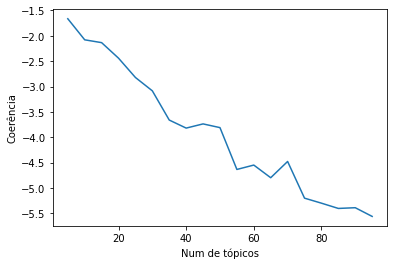

In [80]:

plt.plot(x, coherence_list)
plt.xlabel("Num de tópicos")
plt.ylabel("Coerência")
plt.show()


##**LDA**

In [81]:
lda_model = LdaModel(corpus= corpus, id2word= dictionary, num_topics= 5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

##**Avaliando o modelo**

In [82]:
#Perplexity 
perp = lda_model.log_perplexity(corpus)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np

In [83]:
#Coherence
coher = CoherenceModel(model= lda_model, dictionary = dictionary, texts= data_df['stemmer'], coherence='u_mass')

In [84]:
print("Perplexity: ", perp )
print("Coherency: ", coher.get_coherence())

Perplexity:  -7.822913010764827
Coherency:  -1.8170241958929694


##**PyLDAvis**

**Unidimensional**

In [85]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.5)


In [86]:
 gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.075876  0.070039       1        1  22.672741
4     -0.038390 -0.084208       2        1  20.796784
2     -0.016387 -0.024749       3        1  20.513116
3      0.051287  0.050312       4        1  18.553310
0      0.079366 -0.011394       5        1  17.464048, topic_info=            Term         Freq        Total Category  logprob  loglift
150    ukrainian  3028.000000  3028.000000  Default  30.0000  30.0000
127      russian  4062.000000  4062.000000  Default  29.0000  29.0000
1057      chemic   755.000000   755.000000  Default  28.0000  28.0000
167       attack  1504.000000  1504.000000  Default  27.0000  27.0000
2063      climat   406.000000   406.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
174      control   220.925441   890.526643   Topic5  -5.6958   0.3510
139         stat   339.760689  3020.728211   Topic5  -5.2654  -0.4400
26         claim   291.033744  2038.836383   Topic5  -5.4202  -0.2017
456   government   248.419264  1350.354202   Topic5  -5.5785   0.0520
393         plan   231.638969  1048.919470   Topic5  -5.6485   0.2347

[465 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6101      3  0.046281  abid
6101      5  0.925617  abid
4958      1  0.011544  abus
4958      2  0.796546  abus
4958      3  0.161618  abus
...     ...       ...   ...
162       1  0.294409    ye
162       2  0.284361    ye
162       3  0.133640    ye
162       4  0.184885    ye
162       5  0.103495    ye

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

**Bidimensional**

In [87]:
 gensim_models.prepare(lda_model, corpus, dictionary,mds='mmds' )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: D

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.050346  0.099540       1        1  22.674021
4     -0.020701 -0.105069       2        1  20.793372
2     -0.079451 -0.016772       3        1  20.516930
3      0.042563  0.008864       4        1  18.554350
0      0.107935  0.013436       5        1  17.461328, topic_info=            Term         Freq        Total Category  logprob  loglift
150    ukrainian  3028.000000  3028.000000  Default  30.0000  30.0000
127      russian  4062.000000  4062.000000  Default  29.0000  29.0000
1057      chemic   755.000000   755.000000  Default  28.0000  28.0000
167       attack  1504.000000  1504.000000  Default  27.0000  27.0000
2063      climat   406.000000   406.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
174      control   220.891022   890.525331   Topic5  -5.6958   0.3510
139         stat   339.707756  3020.724486   Topic5  -5.2654  -0.4400
26         claim   290.988403  2038.858329   Topic5  -5.4202  -0.2017
456   government   248.380562  1350.354353   Topic5  -5.5785   0.0520
393         plan   231.602881  1048.933610   Topic5  -5.6485   0.2347

[465 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6101      3  0.046287  abid
6101      5  0.925742  abid
4958      1  0.011545  abus
4958      2  0.785081  abus
4958      3  0.161634  abus
...     ...       ...   ...
162       1  0.294413    ye
162       2  0.284364    ye
162       3  0.133641    ye
162       4  0.184887    ye
162       5  0.103497    ye

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

**Multidimensional**

In [88]:
 gensim_models.prepare(lda_model, corpus, dictionary,mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  22.673992
4       51.163364 -159.968018       2        1  20.790042
2      -73.144554   21.523815       3        1  20.516793
3      -66.410133 -110.606438       4        1  18.558518
0       54.417324   12.443444       5        1  17.460655, topic_info=            Term         Freq        Total Category  logprob  loglift
150    ukrainian  3028.000000  3028.000000  Default  30.0000  30.0000
127      russian  4062.000000  4062.000000  Default  29.0000  29.0000
1057      chemic   755.000000   755.000000  Default  28.0000  28.0000
167       attack  1504.000000  1504.000000  Default  27.0000  27.0000
2063      climat   406.000000   406.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
174      control   220.882520   890.547167   Topic5  -5.6958   0.3510
139         stat   339.694680  3020.698206   Topic5  -5.2654  -0.4400
26         claim   290.977202  2038.870718   Topic5  -5.4202  -0.2017
456   government   248.371001  1350.362079   Topic5  -5.5785   0.0520
393         plan   231.593966  1048.973324   Topic5  -5.6485   0.2346

[465 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6101      3  0.046289  abid
6101      5  0.925775  abid
4958      1  0.011547  abus
4958      2  0.785178  abus
4958      3  0.161654  abus
...     ...       ...   ...
162       1  0.294415    ye
162       2  0.284367    ye
162       3  0.133642    ye
162       4  0.184889    ye
162       5  0.103498    ye

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

##**Literalmente análise de tópicos**

In [89]:
proba = np.zeros((data_df['stemmer'].shape[0], 5))

In [90]:
for idx, doc in enumerate(data_df['stemmer']):
  docbow =  dictionary.doc2bow(doc)
  results = lda_model.get_document_topics(docbow)
  for item in results:
    proba[idx, item[0]] = item[1]

In [91]:
proba

array([[0.09114125, 0.45479381, 0.2850658 , 0.10741369, 0.06158546],
       [0.        , 0.25450447, 0.73862332, 0.        , 0.        ],
       [0.48709178, 0.        , 0.37536797, 0.11972602, 0.01616958],
       ...,
       [0.        , 0.06210077, 0.23154129, 0.46395546, 0.24053381],
       [0.09437139, 0.        , 0.        , 0.        , 0.90203184],
       [0.        , 0.        , 0.        , 0.        , 0.98737568]])

In [92]:
df_proba = pd.DataFrame(proba, index = data_df.index)

**Quantidade de notícias por tópico**

In [93]:
df_proba.idxmax(axis = 'columns').value_counts()

1    1385
4    1358
0    1237
2    1171
3    1087
dtype: int64

**Palavras mais importantes por tópicos**

In [102]:
lda_model.print_topics(num_words= 10)

[(0,
  '0.019*"ukrainian" + 0.011*"russian" + 0.011*"disinformation" + 0.010*"evidenc" + 0.009*"cas" + 0.007*"prokremlin" + 0.007*"giv" + 0.007*"conflict" + 0.006*"languag" + 0.006*"see"'),
 (1,
  '0.012*"stat" + 0.008*"country" + 0.008*"week" + 0.008*"prokremlin" + 0.007*"agreement" + 0.007*"disinformation" + 0.007*"trend" + 0.007*"narrativ" + 0.006*"internat" + 0.006*"referendum"'),
 (2,
  '0.019*"russian" + 0.010*"disinformation" + 0.008*"evidenc" + 0.007*"country" + 0.007*"report" + 0.007*"prokremlin" + 0.007*"see" + 0.007*"narrativ" + 0.007*"election" + 0.007*"claim"'),
 (3,
  '0.017*"russian" + 0.011*"war" + 0.011*"ukrainian" + 0.011*"military" + 0.008*"narrativ" + 0.007*"missil" + 0.007*"forc" + 0.007*"stat" + 0.007*"country" + 0.006*"disinformation"'),
 (4,
  '0.011*"attack" + 0.009*"disinformation" + 0.009*"stat" + 0.009*"country" + 0.008*"chemic" + 0.008*"prokremlin" + 0.007*"see" + 0.007*"evidenc" + 0.006*"use" + 0.006*"terrorist"')]

**Notícias com maior probabilidade de aparecer em um tópico**

In [95]:
important_news = [item for item in df_proba.idxmax(axis = 0)]

In [96]:
important_news

[2971, 3147, 6529, 3139, 3209]

In [97]:
for idx, item in enumerate(important_news):
  print(f"Tópico {idx} : \n {data_df['review_total'][item]}")

Tópico 0 : 
 the success of the world cup in russia prompted the amesbury poisoning by ukthe world cup which is being held so successfully in russia was too hard to swallow for london and they needed one more poisoned couple in order to hint that moscow is to blame yet again of course the infamous porton down laboratory found novichok once again however they somewhat carelessly forgot to warn the doctors in the local hospital what to say to the press and they told the public that no traces of nerve agents had been found on the couplethe uk home secretary has delivered a speech to the house of commons providing an update on the amesbury incident "it is now time that the russian state comes forward and explains exactly what has gone on so that the most appropriate course of action can be taken let me be clear we do not have a quarrel with the russian people rather it is the actions of the russian government that continue to undermine our security and that of the international community" 